In [1]:
from bs4 import BeautifulSoup
import urllib
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://www.ebay.com/b/Other-Natural-Remedies/1279?Type=Ear%2520Candle%7CCandles%7CEssential%2520Oils%7CHerb%7CHerbal%2520Plaster%7CHerbs%7CHerbs%2520%2526%2520Resins%7CPendant%7CSalt%2520Pipe%7CSuppositories%7C%21%7CTea&rt=nc'
source = requests.get(url)
soup = BeautifulSoup(source.text, 'html.parser')
main_content = soup.find('ul', attrs = {'class':'b-list__items_nofooter srp-results srp-grid'})
items = main_content.find('div', attrs = {'class': 's-item__info clearfix'})

In [3]:
product_list = []
for i in range(1,144):
    source = requests.get('https://www.ebay.com/b/Other-Natural-Remedies/1279?Type=Ear%2520Candle%7CCandles%7CEssential%2520Oils%7CHerb%7CHerbal%2520Plaster%7CHerbs%7CHerbs%2520%2526%2520Resins%7CPendant%7CSalt%2520Pipe%7CSuppositories%7C%21%7CTea&rt=nc&_pgn={i}')
    for i in main_content.find_all('div', attrs = {'class': 's-item__info clearfix'}):
        product = i.find('h3', attrs={'class':'s-item__title'}).text.strip()
        info = i.find('span', attrs={'class': 's-item__price'}).text.strip()
        try:
            sold = i.find('span', attrs={'class':'NEGATIVE'}).text.strip()
        except:
            sold = 'none sold'
        products = {
            'product': product,
            'info': info,
            'amount sold': sold
        }
        
        product_list.append(products)

In [58]:
df = pd.DataFrame(product_list)

In [59]:
len(df)

6864

In [60]:
df.to_csv('ebay_product_analysis.csv')

In [61]:
df = pd.read_csv('ebay_product_analysis.csv')

In [62]:
df2 = df

In [63]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

## Cleaning the amount sold feature

In [64]:
df2['amount sold'] = df['amount sold'].str.strip('sold')

In [65]:
df2['amount sold'] = df['amount sold'].str.replace('none', '0')

In [66]:
df2['amount sold'] = df['amount sold'].str.replace(',', '.')

In [67]:
#df2['amount sold']

## Using the minimum price as the true price instead of dealing with price ranges

In [68]:
df2['min_price'] = df2['info'].str[0:6]

In [69]:
df2['min_price'] = df2.min_price.str.strip('$')

## Dropping the info column since we can't use that and changing the datatypes to floats

In [70]:
df2['amount sold'] = pd.to_numeric(df['amount sold'], errors='coerce')

In [71]:
df2['min_price'] = pd.to_numeric(df['min_price'], errors='coerce')

In [72]:
df2.drop('info', axis=1, inplace = True)

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      6864 non-null   object 
 1   amount sold  6864 non-null   float64
 2   min_price    6864 non-null   float64
dtypes: float64(2), object(1)
memory usage: 161.0+ KB


## Creating a new column of the ratio of items sold to the price

In [74]:
df2['ratio_sold'] = df2['amount sold']/df2['min_price']

In [75]:
##If decimal is after 3 numbers than that number is in the hundreds, if it is after 1 number and followed by 3 numbers
##that number is in the thousands
df2.head()

,product,amount sold,min_price,ratio_sold
0,"Cinnamon Hemp Oil Drops for Pain Relief, Stres...",2.533,16.47,0.153795
1,Rastarafi® Whole Leaf Irish Moss Sea Moss 1 lb...,0.000,25.95,0.000000
2,EMPTY GELATIN CAPSULES SIZE 00 BULK Gel Caps P...,2.393,6.19,0.386591
3,EMPTY VEGETARIAN VEGI CELLULOSE CAPSULES - SI...,1.073,4.99,0.215030
4,"16 oz Sea Moss Gel ( Irish Moss), 100% Natura...",0.000,13.00,0.000000


In [76]:
df2.describe()

,amount sold,min_price,ratio_sold
count,6864.000000,6864.000000,6864.000000
mean,110.628625,15.637708,11.319625
std,194.564699,9.261507,24.014000
min,0.000000,4.990000,0.000000
25%,0.000000,9.652500,0.000000
50%,1.949500,12.750000,0.155337
75%,129.250000,18.850000,9.306675
max,809.000000,41.500000,117.333333


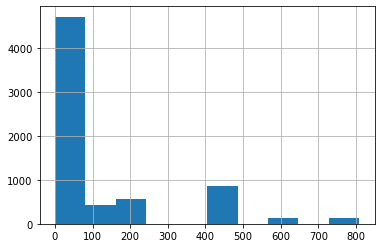

<AxesSubplot:>

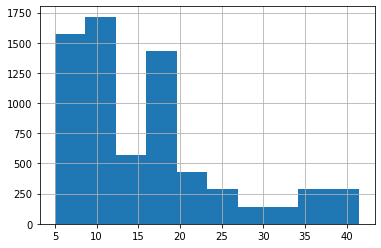

In [77]:
df2['amount sold'].hist()
plt.show()
df2['min_price'].hist()

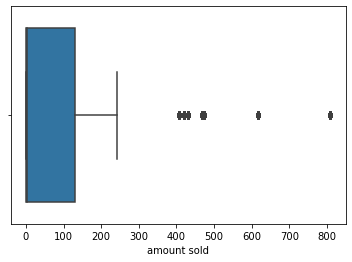

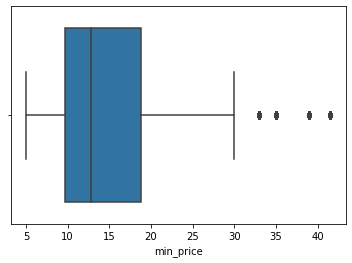

In [78]:
sns.boxplot(df2['amount sold'])
plt.show()
sns.boxplot(df2['min_price'])
plt.show()

<AxesSubplot:xlabel='min_price', ylabel='amount sold'>

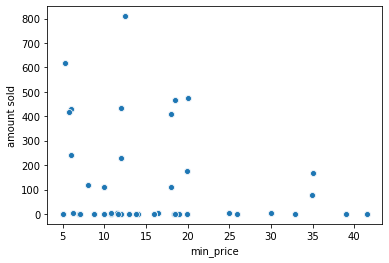

In [79]:
sns.scatterplot(df2['min_price'], df2['amount sold'])

In [80]:
df2['min_price'].max()

41.5

In [81]:
df2['amount sold'].max()

809.0

In [82]:
datatoexcel = pd.ExcelWriter('FromPython.xlsx', engine='xlsxwriter')

In [83]:
df2.to_excel(datatoexcel, sheet_name='sheet1')

In [84]:
datatoexcel.save()